In [27]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

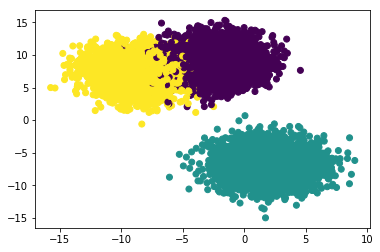

In [29]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 2.
X, y = make_blobs(
    n_samples=10000,
    centers=3,
    cluster_std=2,
    n_features=3,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.5,
    random_state=42)

Clustering using Kmeans, mean shift, spectral clustering and affinity propagation.

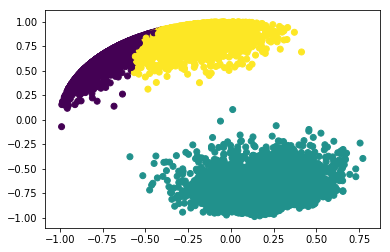

Comparing k-means clusters against the data:
col_0     0     1     2
row_0                  
0       152     0  3203
1         0  3333     0
2      3182     0   130


In [30]:
# Normalize the data.
X_norm = normalize(X)

# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_norm)

# Plot the solution.
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Number of estimated clusters: 3


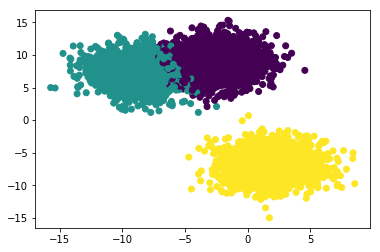

Comparing the assigned categories to the ones in the data:
col_0     0     1     2
row_0                  
0      1640    44     0
1         0     0  1645
2        81  1590     0


In [31]:
from sklearn.cluster import MeanShift, estimate_bandwidth

#Function automatically derives a bandwidth number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

#Extract cluster assignments for each data point.
labels = ms.labels_

#Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

#Count our clusters
n_clusters = len(np.unique(labels))
print("Number of estimated clusters: {}".format(n_clusters))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

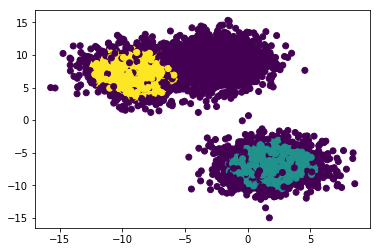

Comparing the assigned categories to the ones in the data:
col_0     0     1     2
row_0                  
0      1669     0    15
1       551  1094     0
2       536     0  1135


In [32]:
from sklearn.cluster import SpectralClustering

n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [33]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation().fit(X_train)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Estimated number of clusters: 80


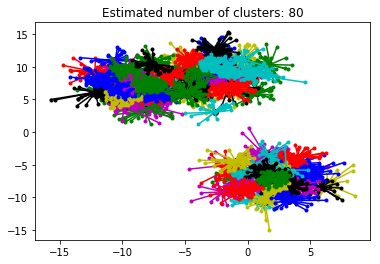

In [34]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members,0], X_train[class_members,1], col + '.')
    plt.plot(cluster_center[0],
            cluster_center[1],
            'o',
            markerfacecolor=col,
            markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        
plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

Increasing the number of clusters to 5.

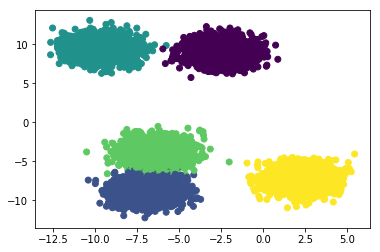

In [35]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[1, 1], [-1, -1], [1, -1]]

# Make 10,000 rows worth of data with 5 features representing 5
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=5,
    cluster_std=1,
    n_features=5,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    random_state=42)

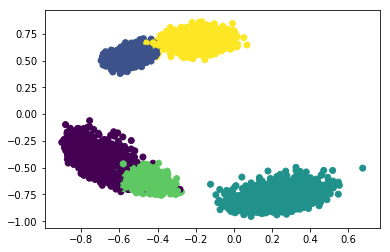

Comparing k-means clusters against the data:
col_0     0     1     2     3     4
row_0                              
0         0     0     0  2000     0
1         0     0  2000     0     0
2         0     0     0     0  2000
3         0  2000     0     0     0
4      2000     0     0     0     0


In [37]:
# Normalize the data.
X_norm = normalize(X)

# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X_norm)

# Plot the solution.
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Number of estimated clusters: 5


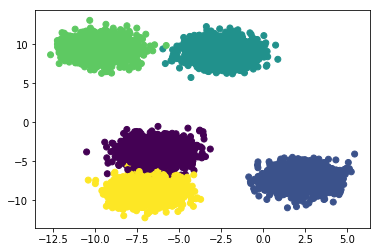

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3     4
row_0                              
0         0     0  1806     0     0
1         0     0     0     0  1783
2         0     0     0  1793     0
3      1809     0     0     0     0
4         0  1809     0     0     0


In [38]:
from sklearn.cluster import MeanShift, estimate_bandwidth

#Function automatically derives a bandwidth number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

#Extract cluster assignments for each data point.
labels = ms.labels_

#Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

#Count our clusters
n_clusters = len(np.unique(labels))
print("Number of estimated clusters: {}".format(n_clusters))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

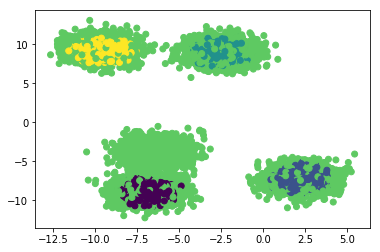

Comparing the assigned categories to the ones in the data:
col_0    0     1    2     3     4
row_0                            
0        0     0  942   864     0
1      979     0    0   804     0
2        0     0    0   768  1025
3        0     0    0  1809     0
4        0  1048    0   761     0


In [39]:
from sklearn.cluster import SpectralClustering

n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [40]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation().fit(X_train)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Estimated number of clusters: 143


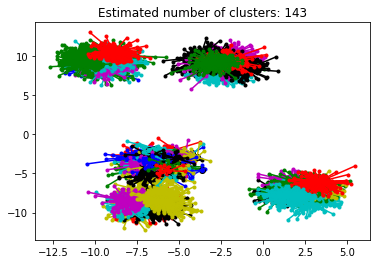

In [41]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members,0], X_train[class_members,1], col + '.')
    plt.plot(cluster_center[0],
            cluster_center[1],
            'o',
            markerfacecolor=col,
            markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        
plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()